<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self Learning Resource**
1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



#### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---

### **1.1 Loading Dataset - Loading dataset from pycaret**

In [3]:
from pycaret.datasets import get_data

# No output

---
### **1.2 Get the list of datasets available in pycaret (55)**
---

In [4]:
# Internet connection is required
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.3 Get boston dataset**
---

In [5]:
bostonDataSet = get_data("boston")    # SN is 46
# This is regression dataset. The values in medv are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Read data from file

In [6]:
# import pandas as pd
# bostonDataSet = pd.read_csv("myFile.csv")

---
### **1.4 Parameter setting for all regression models**
- Train/Test division
- Sampling
- Normalization
- Transformation
- PCA (Dimention Reduction)
- Handaling of Outliers
- Feature Selection
---

In [7]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

,Description,Value
0,session_id,1093
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 Run and compare the Model Performance**
---

In [8]:
cm = compare_models()
# Explore more parameters

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2116,11.3508,3.1636,0.8840,0.1403,0.1083,0.441
gbr,Gradient Boosting Regressor,2.3272,12.2435,3.3255,0.8695,0.1537,0.1191,0.099
lightgbm,Light Gradient Boosting Machine,2.3460,12.2742,3.3542,0.8667,0.1496,0.1160,0.086
rf,Random Forest Regressor,2.5170,14.5950,3.5862,0.8480,0.1583,0.1236,0.513
ada,AdaBoost Regressor,2.8895,15.2362,3.7823,0.8334,0.1746,0.1501,0.098
ridge,Ridge Regression,3.5181,25.8415,4.8515,0.7190,0.2372,0.1758,0.014
br,Bayesian Ridge,3.5107,26.1075,4.8709,0.7177,0.2367,0.1752,0.014
lr,Linear Regression,3.5547,25.8846,4.8693,0.7160,0.2409,0.1773,0.284
lar,Least Angle Regression,3.6181,26.5615,4.9452,0.7068,0.2442,0.1800,0.018
huber,Huber Regressor,3.4193,29.3779,5.0666,0.6976,0.2479,0.1676,0.041


---
### **1.6 Three line of code for model comparison for "Insurance" dataset**
---

In [9]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2431.2550,1.972729e+07,4386.9258,0.8669,0.4029,0.2658,0.091
lightgbm,Light Gradient Boosting Machine,2773.2119,2.246677e+07,4698.8795,0.8474,0.4918,0.3257,0.051
rf,Random Forest Regressor,2590.5390,2.255380e+07,4702.4952,0.8472,0.4333,0.2853,0.552
et,Extra Trees Regressor,2617.4843,2.545092e+07,4989.0879,0.8289,0.4405,0.2776,0.499
ada,AdaBoost Regressor,4008.5145,2.635270e+07,5110.5828,0.8215,0.6068,0.6781,0.032
llar,Lasso Least Angle Regression,4238.5416,3.779004e+07,6134.0158,0.7425,0.5560,0.4210,0.015
ridge,Ridge Regression,4254.8741,3.780403e+07,6135.0490,0.7424,0.5492,0.4237,0.013
br,Bayesian Ridge,4251.6692,3.780775e+07,6135.3531,0.7423,0.5469,0.4232,0.015
lr,Linear Regression,4241.9418,3.781677e+07,6136.0857,0.7422,0.5422,0.4216,0.015
lasso,Lasso Regression,4242.6615,3.781611e+07,6136.0575,0.7422,0.5435,0.4217,0.015


---
### **1.7 Three line of code for model comparison for "House" dataset**
---

In [10]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,18200.2046,8.436113e+08,28414.6342,0.8607,0.1503,0.1085,2.409
gbr,Gradient Boosting Regressor,17529.9761,8.666400e+08,28393.7510,0.8543,0.1407,0.1018,0.773
lightgbm,Light Gradient Boosting Machine,17916.9141,9.333005e+08,29539.9898,0.8485,0.1459,0.1031,0.243
omp,Orthogonal Matching Pursuit,17362.4478,1.005995e+09,29029.5954,0.8216,0.1451,0.1011,0.038
llar,Lasso Least Angle Regression,17902.1130,1.240373e+09,31373.9300,0.7791,0.1765,0.1084,0.448
ridge,Ridge Regression,18492.6539,1.270742e+09,32101.9104,0.7765,0.1646,0.1102,0.054
et,Extra Trees Regressor,22319.8368,1.335644e+09,36129.9422,0.7755,0.1761,0.1257,2.565
lasso,Lasso Regression,18802.5346,1.401863e+09,33378.6100,0.7497,0.2048,0.1158,0.199
ada,AdaBoost Regressor,26601.4431,1.500942e+09,38407.9435,0.7436,0.2168,0.1768,0.499
en,Elastic Net,20959.2433,1.489116e+09,35773.5309,0.7420,0.1630,0.1208,0.209


---
# **2. Regression: Advance - 1**
---

#### **2.1 Model Performance using data "Normalization"**

In [11]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1409,10.2971,3.1089,0.8781,0.1398,0.1083,0.445
gbr,Gradient Boosting Regressor,2.3236,12.5077,3.3744,0.8424,0.1548,0.1195,0.095
rf,Random Forest Regressor,2.4131,13.4528,3.5387,0.8340,0.1563,0.1211,0.515
lightgbm,Light Gradient Boosting Machine,2.5056,13.9231,3.6150,0.8333,0.1561,0.1223,0.040
ada,AdaBoost Regressor,2.7593,15.1922,3.7509,0.8205,0.1793,0.1465,0.097
knn,K Neighbors Regressor,2.7787,19.0090,4.2797,0.7827,0.1690,0.1282,0.062
ridge,Ridge Regression,3.4164,23.5298,4.7781,0.7309,0.2719,0.1729,0.013
br,Bayesian Ridge,3.3767,23.5813,4.7811,0.7305,0.2710,0.1712,0.014
lr,Linear Regression,3.4363,23.5706,4.7830,0.7304,0.2725,0.1738,0.015
lar,Least Angle Regression,3.4363,23.5706,4.7830,0.7304,0.2725,0.1738,0.018


---
### **2.2 Model Performance using "Feature Selection"**
---

In [12]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0847,8.4395,2.8860,0.8686,0.1332,0.1057,0.097
rf,Random Forest Regressor,2.2521,10.6077,3.2249,0.8337,0.1455,0.1138,0.529
et,Extra Trees Regressor,2.1596,11.1482,3.2612,0.8300,0.1418,0.1080,0.450
lightgbm,Light Gradient Boosting Machine,2.3610,12.1478,3.4640,0.8187,0.1519,0.1158,0.040
ada,AdaBoost Regressor,2.8397,15.0384,3.8484,0.7753,0.1803,0.1512,0.099
dt,Decision Tree Regressor,2.9182,16.7266,4.0404,0.7504,0.1820,0.1464,0.017
lr,Linear Regression,3.4758,24.8908,4.9481,0.6196,0.2349,0.1734,0.013
lar,Least Angle Regression,3.4994,24.9885,4.9589,0.6185,0.2349,0.1745,0.018
ridge,Ridge Regression,3.4552,24.8702,4.9424,0.6180,0.2300,0.1734,0.014
br,Bayesian Ridge,3.4562,25.3576,4.9869,0.6118,0.2302,0.1741,0.014


---
### **2.3 Model Performance using "Outlier Removal"**
---

In [13]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1774,9.8929,3.0739,0.8785,0.1337,0.1046,0.443
gbr,Gradient Boosting Regressor,2.2829,11.0037,3.2429,0.8656,0.1415,0.1107,0.093
rf,Random Forest Regressor,2.3270,11.4732,3.3184,0.8587,0.1444,0.1132,0.512
lightgbm,Light Gradient Boosting Machine,2.4417,12.6856,3.5015,0.8423,0.1463,0.1144,0.036
ada,AdaBoost Regressor,2.9564,15.7168,3.9059,0.7989,0.1774,0.1500,0.099
dt,Decision Tree Regressor,3.0256,20.4309,4.4522,0.7398,0.1973,0.1486,0.018
lr,Linear Regression,3.3925,23.0427,4.7471,0.7180,0.2539,0.1654,0.014
lar,Least Angle Regression,3.3925,23.0426,4.7471,0.7180,0.2539,0.1654,0.018
ridge,Ridge Regression,3.3633,23.0841,4.7451,0.7173,0.2460,0.1638,0.013
br,Bayesian Ridge,3.3794,23.5007,4.7861,0.7118,0.2444,0.1643,0.015


---
### **2.4 Model Performance using "Transformation"**
---

In [14]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1457,11.1084,3.1565,0.8544,0.1333,0.1030,0.451
gbr,Gradient Boosting Regressor,2.2461,11.5691,3.1969,0.8509,0.1434,0.1132,0.092
rf,Random Forest Regressor,2.3739,14.2939,3.5224,0.8193,0.1518,0.1168,0.506
lightgbm,Light Gradient Boosting Machine,2.4571,14.5121,3.6070,0.8168,0.1508,0.1177,0.040
ada,AdaBoost Regressor,2.7882,15.6017,3.7791,0.7934,0.1751,0.1467,0.098
knn,K Neighbors Regressor,2.8249,19.7275,4.1655,0.7556,0.1718,0.1308,0.063
br,Bayesian Ridge,3.3656,21.5603,4.5656,0.7036,0.2141,0.1693,0.013
ridge,Ridge Regression,3.4000,21.7049,4.5846,0.6992,0.2150,0.1708,0.014
lr,Linear Regression,3.4138,21.7933,4.5946,0.6974,0.2154,0.1714,0.013
huber,Huber Regressor,3.2818,23.1319,4.6762,0.6909,0.2214,0.1615,0.030


---
### **2.5 Model Performance using "PCA"**
---

In [15]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.7285,48.7100,6.8159,0.3806,0.2766,0.2324,0.058
rf,Random Forest Regressor,4.7534,50.0334,6.9328,0.3622,0.2814,0.2325,0.450
et,Extra Trees Regressor,4.8297,51.7517,7.0968,0.3210,0.2875,0.2402,0.408
lightgbm,Light Gradient Boosting Machine,5.0685,53.5134,7.1827,0.3169,0.2899,0.2457,0.031
lasso,Lasso Regression,5.2712,54.8899,7.2384,0.3151,0.2989,0.2629,0.015
lr,Linear Regression,5.2690,54.8906,7.2386,0.3150,0.2988,0.2627,0.014
ridge,Ridge Regression,5.2690,54.8906,7.2386,0.3150,0.2988,0.2627,0.014
en,Elastic Net,5.2702,54.8898,7.2385,0.3150,0.2989,0.2628,0.014
lar,Least Angle Regression,5.2690,54.8906,7.2386,0.3150,0.2988,0.2627,0.014
br,Bayesian Ridge,5.2891,54.9422,7.2411,0.3148,0.2996,0.2644,0.013


---
### **2.6 Model Performance using "Outlier Removal" + "Normalization"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0662,8.4176,2.8703,0.8873,0.1383,0.1054,0.094
et,Extra Trees Regressor,2.1253,10.4942,3.1460,0.8684,0.1391,0.1055,0.449
rf,Random Forest Regressor,2.2508,10.8393,3.2163,0.8615,0.1476,0.1129,0.517
lightgbm,Light Gradient Boosting Machine,2.4258,12.0212,3.4017,0.8480,0.1546,0.1206,0.040
knn,K Neighbors Regressor,2.8566,17.8865,4.1027,0.7906,0.1713,0.1364,0.062
dt,Decision Tree Regressor,2.9136,16.1307,3.9552,0.7845,0.1923,0.1510,0.017
ada,AdaBoost Regressor,2.8339,16.8634,3.9868,0.7825,0.1807,0.1449,0.095
br,Bayesian Ridge,3.4036,24.8748,4.8390,0.7005,0.2486,0.1676,0.015
ridge,Ridge Regression,3.4472,24.8976,4.8560,0.6979,0.2502,0.1695,0.013
lar,Least Angle Regression,3.4704,25.0056,4.8725,0.6955,0.2514,0.1706,0.017


---
### **2.7 Model Performance using "Outlier Removal" + "Normalization" + "Transformation"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1811,11.1224,3.2423,0.8177,0.1455,0.1120,0.436
rf,Random Forest Regressor,2.2544,11.0172,3.2339,0.8114,0.1515,0.1186,0.515
gbr,Gradient Boosting Regressor,2.3084,11.3601,3.3168,0.8015,0.1546,0.1211,0.092
lightgbm,Light Gradient Boosting Machine,2.4839,13.9977,3.6042,0.7684,0.1659,0.1301,0.039
ada,AdaBoost Regressor,2.7891,14.4805,3.7451,0.7515,0.1798,0.1525,0.100
knn,K Neighbors Regressor,2.9230,18.6327,4.2467,0.7049,0.1856,0.1450,0.061
huber,Huber Regressor,3.1383,20.3769,4.4555,0.6821,0.2136,0.1591,0.029
ridge,Ridge Regression,3.2753,19.5628,4.3866,0.6811,0.2145,0.1726,0.013
lr,Linear Regression,3.2935,19.5978,4.3895,0.6802,0.2145,0.1733,0.014
br,Bayesian Ridge,3.2606,19.7576,4.4092,0.6790,0.2157,0.1719,0.015


---
# **3. Regression: Advance - 2**
---

### **3.1 Build a single model - "RandomForest"**

In [18]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9696,6.6776,2.5841,0.8575,0.1272,0.0990
1,2.3774,12.6549,3.5574,0.8642,0.1336,0.1077
2,2.4301,12.9703,3.6014,0.8322,0.1458,0.1113
3,2.8484,13.9835,3.7395,0.8827,0.2272,0.1921
4,2.5946,17.1095,4.1364,0.8690,0.1570,0.1176
5,2.1717,10.6068,3.2568,0.8132,0.1608,0.1178
6,1.7658,5.5998,2.3664,0.8905,0.1363,0.1052
7,2.7192,15.8119,3.9764,0.8712,0.1559,0.1263
8,2.3695,11.4125,3.3782,0.8482,0.1379,0.1117
9,2.1567,7.6479,2.7655,0.8921,0.1428,0.1179


---
### **3.2 Other models**
---

- 'ada' - AdaBoost Regressor
- 'ard' - Automatic Relevance Determination
- 'br' - Bayesian Ridge
- 'dt' - Decision Tree Regressor
- 'en' - Elastic Net
- 'et' - Extra Trees Regressor
- 'gbr' - Gradient Boosting Regressor
- 'huber' - Huber Regressor
- 'knn' - K Neighbors Regressor
- 'kr' - Kernel Ridge
- 'lar' - Least Angle Regression
- 'lasso' - Lasso Regression
- 'lightgbm' - Light Gradient Boosting Machine
- 'llar' - Lasso Least Angle Regression
- 'lr' - Linear Regression
- 'mlp' - MLP Regressor
- 'omp' - Orthogonal Matching Pursuit
- 'par' - Passive Aggressive Regressor
- 'ransac' - Random Sample Consensus
- 'rf' - Random Forest Regressor
- 'ridge' - Ridge Regression
- 'svm' - Support Vector Regression
- 'tr' - TheilSen Regressor
- 'xgboost' - Extreme Gradient Boosting


---
### **3.3 Save the trained model**
---

In [19]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **3.4 Load the model**
---

In [20]:
rfModel = load_model('rfModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **3.5 Make prediction on the new dataset**
---

#### **Get new dataset**

In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on new dataset**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.944000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.856000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.620001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.654001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,34.381001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,27.233001
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,22.276000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,22.857000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.297000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.575000


---
### **3.6 Scatter plot b/w actual and predicted**
---

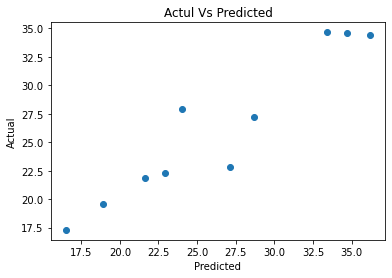

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **3.7 Save prediction results to csv**
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
# No output

---
### **3.8 Plot the Model**
---
##### Following parameter can be plot for model
- Prediction Error Plot    'error'
- Learning Curve           'learning'
- Validation Curve         vc'
- Feature Importance       feature'
- Model Hyperparameter     parameter'

---
##### **3.8.1 Create RandomForest or any other model**
---

In [25]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9696,6.6776,2.5841,0.8575,0.1272,0.0990
1,2.3774,12.6549,3.5574,0.8642,0.1336,0.1077
2,2.4301,12.9703,3.6014,0.8322,0.1458,0.1113
3,2.8484,13.9835,3.7395,0.8827,0.2272,0.1921
4,2.5946,17.1095,4.1364,0.8690,0.1570,0.1176
5,2.1717,10.6068,3.2568,0.8132,0.1608,0.1178
6,1.7658,5.5998,2.3664,0.8905,0.1363,0.1052
7,2.7192,15.8119,3.9764,0.8712,0.1559,0.1263
8,2.3695,11.4125,3.3782,0.8482,0.1379,0.1117
9,2.1567,7.6479,2.7655,0.8921,0.1428,0.1179


---
##### **3.8.2 Plot Error**
---

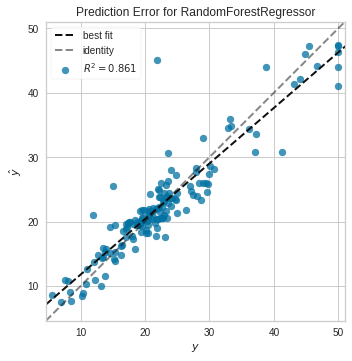

In [26]:
plot_model(rf, plot='error')

---
##### **3.8.3 Plot Learning Curve**
---

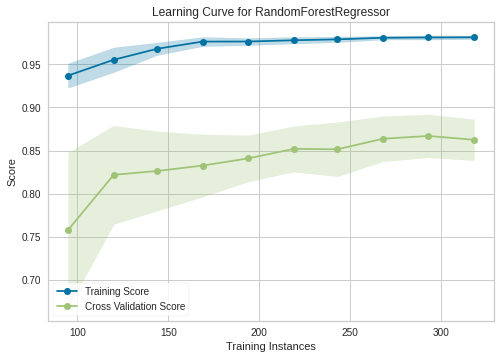

In [27]:
plot_model(rf, plot='learning')

---
##### **3.8.4 Plot Validation Curve**
---

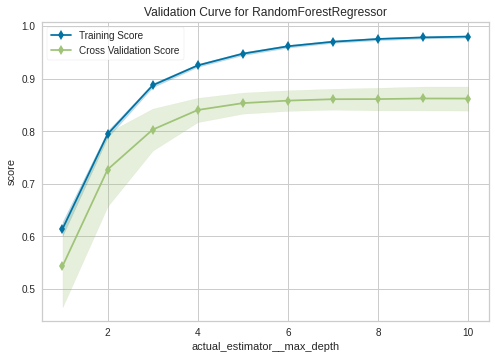

In [28]:
plot_model(rf, plot='vc')

---
### **3.9 Feature Importance**
---

##### **3.9.1 Feature Importance using Random Forest**

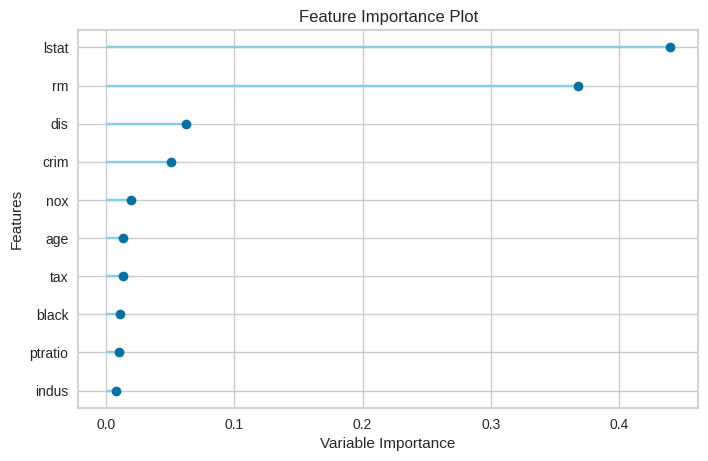

In [29]:
model = create_model('rf')
plot_model(model, plot='feature')

---
##### **3.9.2 Feature Importance using Extra Trees Regressor**
---

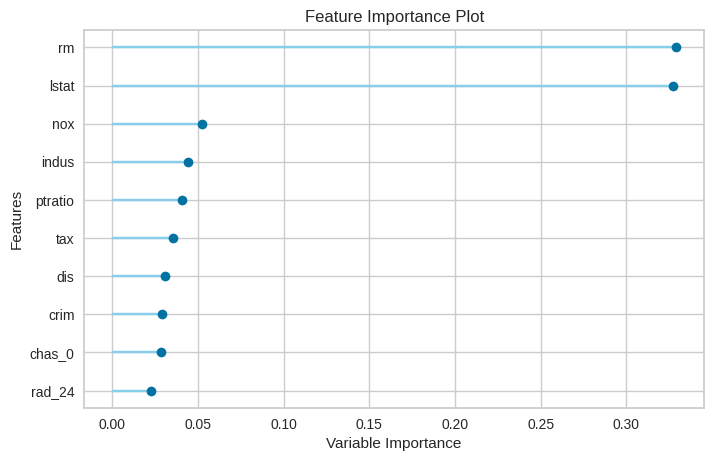

In [30]:
model = create_model('et')
plot_model(model, plot='feature')

---
##### **3.9.3 Feature Importance using Decision Tree**
---

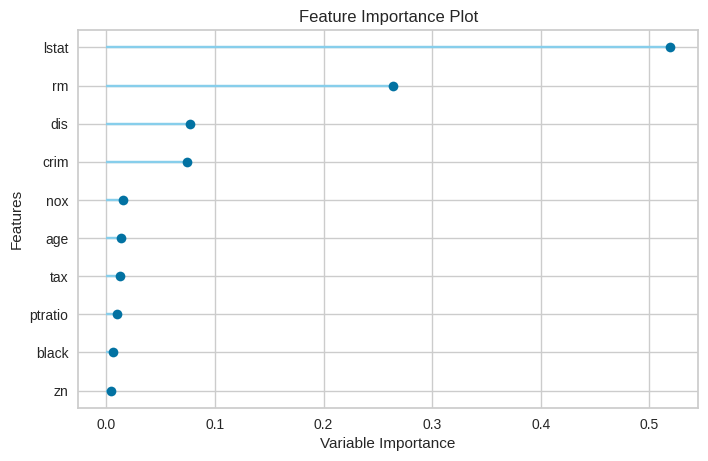

In [35]:
model = create_model('dt')
plot_model(model, plot='feature')

---
##### **3.10 Deploy the model on AWS</span>  <a href="https://pycaret.org/regression/#deploy-model">Click Here</a>**
---

#### **Self Learning Resource**

###### 1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

###### 2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>